# Top 10 suppliers by total spend ?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading cleaned data from processed data folder
df = pd.read_csv('../data/processed data/master_spend_cleand_data.csv')



In [3]:
top_10_supplires= df.groupby('Supplier')['Amount'].sum().reset_index()
top_10_supplires = top_10_supplires.sort_values('Amount', ascending=False).head(10)
top_10_supplires


,Supplier,Amount
257,Ukri - Engineering And Physical Sciences Resea...,6.311920e+09
261,Ukri-innovate Uk,2.881333e+09
260,Ukri - Science And Technology Facilities Council,1.820028e+09
258,Ukri - Medical Research Council,1.515938e+09
253,Uk Space Agency,1.027000e+09
255,Ukri - Biotechnology And Biological Science Re...,1.004000e+09
259,Ukri - Natural Environment Research Council,7.470584e+08
236,The Royal Society,4.206324e+08
256,Ukri - Economic And Social Research Council,3.900000e+08
142,Met Office,3.877640e+08


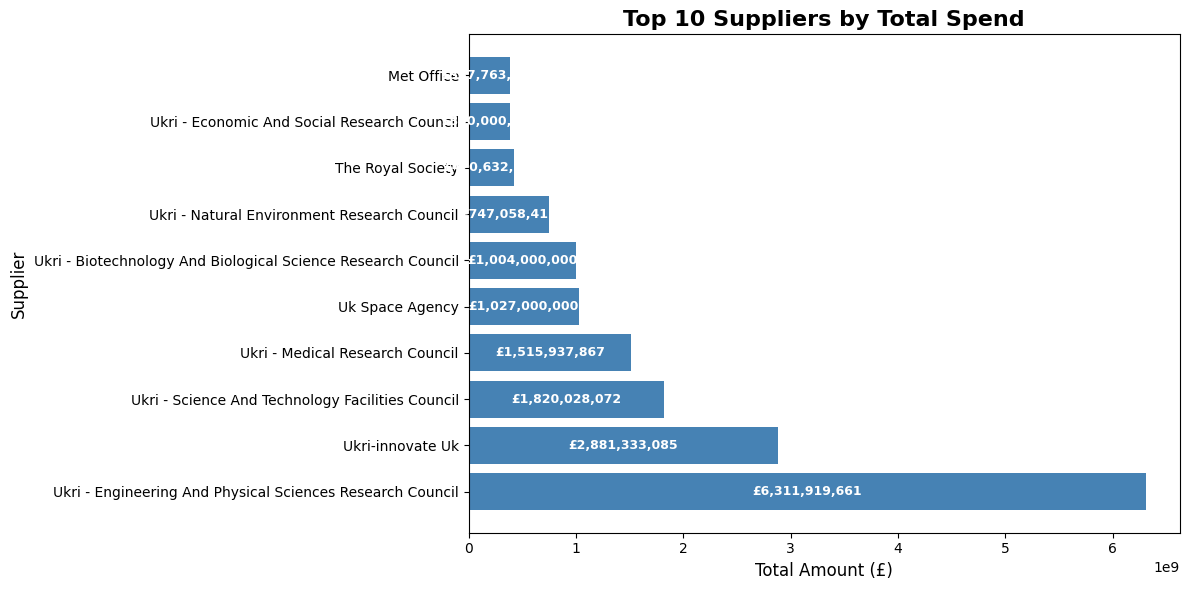

In [4]:


# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.barh(top_10_supplires['Supplier'], top_10_supplires['Amount'], color='steelblue')

# Add labels and title
ax.set_title('Top 10 Suppliers by Total Spend', fontsize=16, fontweight='bold')
ax.set_xlabel('Total Amount (£)', fontsize=12)
ax.set_ylabel('Supplier', fontsize=12)

# Add value labels inside bars
for bar, amount in zip(bars, top_10_supplires['Amount']):
    ax.text(bar.get_width() * 0.5, bar.get_y() + bar.get_height()/2,
            f'£{amount:,.0f}', va='center', ha='center',
            fontsize=9, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# What percentage of total budget do they represent? 


In [18]:
# Calculate total budget
total_budget = df['Amount'].sum()

# Add percentage column to top 10 suppliers
top_10_supplires['Percentage'] = (top_10_supplires['Amount'] / total_budget * 100).round(2)

print(f"Total Budget: £{total_budget:,.2f}")
print(top_10_supplires)


Total Budget: £18,097,912,376.53
                                              Supplier        Amount  \
257  Ukri - Engineering And Physical Sciences Resea...  6.311920e+09   
261                                   Ukri-innovate Uk  2.881333e+09   
260   Ukri - Science And Technology Facilities Council  1.820028e+09   
258                    Ukri - Medical Research Council  1.515938e+09   
253                                    Uk Space Agency  1.027000e+09   
255  Ukri - Biotechnology And Biological Science Re...  1.004000e+09   
259        Ukri - Natural Environment Research Council  7.470584e+08   
236                                  The Royal Society  4.206324e+08   
256        Ukri - Economic And Social Research Council  3.900000e+08   
142                                         Met Office  3.877640e+08   

     Percentage  
257       34.88  
261       15.92  
260       10.06  
258        8.38  
253        5.67  
255        5.55  
259        4.13  
236        2.32  
256        2

# Is spending concentrated with few suppliers or distributed?


In [ ]:
# Compare top 10 vs rest of suppliers
top10_total = top_10_supplires['Amount'].sum()
rest_total = total_budget - top10_total

print(f"Top 10 suppliers:  £{top10_total:,.2f} ({top10_total/total_budget*100:.1f}%)")
print(f"Rest of suppliers: £{rest_total:,.2f} ({rest_total/total_budget*100:.1f}%)")

# Conclusion
if top10_total/total_budget > 0.5:
    print("\n✅ Spending is CONCENTRATED with few suppliers")
else:
    print("\n✅ Spending is DISTRIBUTED across many suppliers")


# ChatGPT was used to generate the final output using if statements and to format large numbers with commas and percentages.

Top 10 suppliers:  £16,505,673,492.11 (91.2%)
Rest of suppliers: £1,592,238,884.42 (8.8%)

✅ Spending is CONCENTRATED with few suppliers
